# **Mission_1 토익 점수 데이터 분석**


## <미션>

최종 차수 점수 변화(Score_diff_total)와 feature들간의 관계를 분석하기 위한 가설 검증 수행
* 전처리 단계에서 생성한 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.
* 개별 변수 및 개별 변수들 간의 관계에 대해 분석합니다.
* [도전 미션] 새로운 변수를 추가하여 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 필요한 라이브러리, 함수를 추가하시오.
## 코드 입력

import scipy.stats as spst



### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기
    * toeic_preprocessed_data.csv

In [3]:
## 코드 입력
file = pd.read_csv('toeic_preprocessed_data.csv')
df = pd.DataFrame(file)

df.tail(2)

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
498,499,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,4,알고 있음,7,371,324,695,378,326,704,88
499,500,M,1984,235,226,461,승진,오프라인강의,비즈니스 시뮬레이션(Role Play),주5-6회,7,알고 있음,15,169,188,357,172,190,362,99


<br><br><hr>

## 1. 기본 분석


  - 데이터프레임의 크기를 확인
  - 데이터프레임의 컬럼명과 컬렴별 데이터 개수, 데이터 타입을 확인
  - 데이터프레임 전체에 대한 기초통계량 확인
  - 결측치(NaN) 확인
    * 결측치(NaN)가 존재한다면 적절하게 조치합니다.

#### &nbsp;&nbsp; 1-1) 데이터프레임 크기 확인

In [4]:
## 코드 입력
df.shape

(500, 20)

#### &nbsp;&nbsp; 1-2) 컬럼명, 데이터 개수, 데이터 타입 확인

In [5]:
## 코드 입력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

#### &nbsp;&nbsp; 1-3) 기초통계량 확인

In [6]:
## 코드 입력
df.describe()

,ID,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1992.906000,368.240000,369.518000,737.798000,5.098000,9.460000,313.878000,312.822000,626.70000,338.120000,338.154000,676.284000,61.514000
std,144.481833,8.224381,82.135393,81.665858,155.901584,2.779901,4.955554,85.555611,86.574966,148.57171,84.169535,83.854382,153.178624,39.739051
min,1.000000,1973.000000,141.000000,135.000000,280.000000,1.000000,1.000000,105.000000,84.000000,250.00000,120.000000,129.000000,260.000000,0.000000
25%,125.750000,1986.750000,295.000000,295.000000,591.750000,3.000000,5.000000,259.750000,250.000000,519.00000,279.000000,281.500000,557.750000,30.000000
50%,250.500000,1992.500000,372.500000,375.000000,760.500000,5.000000,8.000000,308.000000,311.500000,642.00000,333.500000,335.000000,691.000000,63.000000
75%,375.250000,2000.000000,434.250000,437.250000,860.250000,7.000000,13.250000,369.250000,377.250000,735.00000,395.250000,400.000000,790.500000,83.000000
max,500.000000,2007.000000,495.000000,495.000000,990.000000,10.000000,20.000000,495.000000,491.000000,970.00000,495.000000,495.000000,990.000000,281.000000


#### &nbsp;&nbsp; 1-4) 결측치(N/A) 개수 확인

In [7]:
## isna
## 코드 입력
df.isna().sum()

ID                  0
Gender              0
Birth_Year          0
3rd_LC_Score        0
3rd_RC_Score        0
3rd_Total_Score     0
학습목표                0
학습방법                0
강의 학습 교재 유형         0
학습빈도                0
기출문제 공부 횟수          0
취약분야 인지 여부          0
토익 모의테스트 횟수         0
1st_LC_Score        0
1st_RC_Score        0
1st_Total_Score     0
2nd_LC_Score        0
2nd_RC_Score        0
2nd_Total_Score     0
Score_diff_total    0
dtype: int64

<br><br><hr>

## 2. 단변량 분석


- 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
- 단일 변수로 분석
    * 숫자형 변수 : 기초통계량, 히스토그램, kdeplot, 박스플롯
    * 범주형 변수 : 범주별 빈도수, 바 플롯

#### &nbsp;&nbsp; 2-1) 최종 차수 점수 변화(Score_diff_total)

,count,mean,std,min,25%,50%,75%,max
Score_diff_total,500.0,61.514,39.739051,0.0,30.0,63.0,83.0,281.0


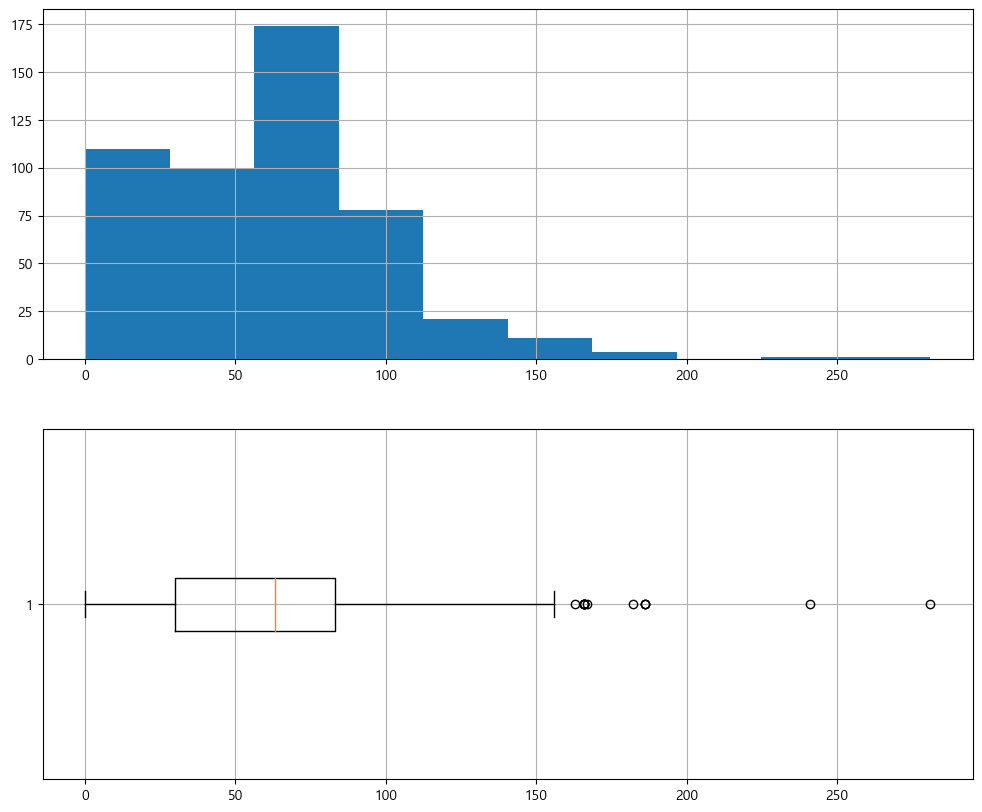

In [48]:
## 'Score_diff_total' 변수의 기초통계량 확인
## 코드 입력
display(df[['Score_diff_total']].describe().T)


## 'Score_diff_total' 변수의 histplot그리기
## 코드 입력

plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['Score_diff_total'])
plt.grid()


## 'Score_diff_total' 변수의 boxplot 그리기
## 코드 입력



plt.subplot(2,1,2)
plt.boxplot(df['Score_diff_total'], vert = False)
plt.grid()

plt.show()



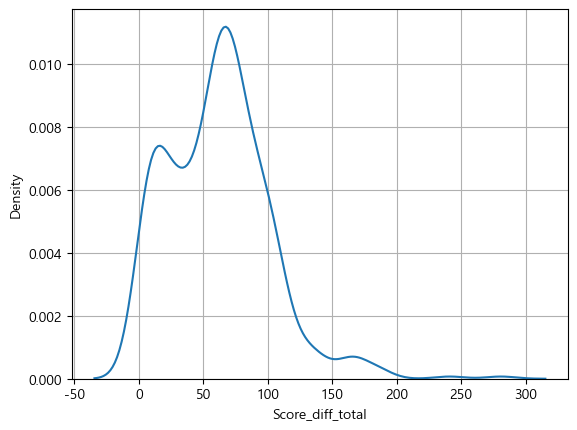

In [11]:
## 'Score_diff_total' 변수의 kdeplot 그리기
## 코드 입력
sns.kdeplot(df['Score_diff_total'])
plt.grid()

plt.show()

#### &nbsp;&nbsp; 2-2) 범주형 변수
   * 분석 방법 : 범주별 빈도수, countplot
   * 대상 변수 : Gender, 학습목표, 학습방법, 강의 학습 교재 유형, 학습빈도, 취약분야 인지 여부

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-1) 'Gender'

M    250
F    250
Name: Gender, dtype: int64
M    0.5
F    0.5
Name: Gender, dtype: float64


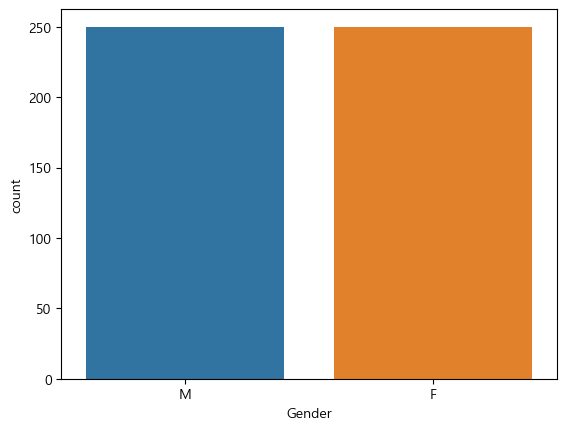

In [51]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['Gender'].value_counts())# 250 / 250

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['Gender'].value_counts() / df.shape[0]) # 0.5 / 0.5

## 그래프 분석하기 : countplot()
sns.countplot(x = df['Gender'])
plt.show()



##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-2) 학습목표

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64
자기계발    0.658
승진      0.310
취업      0.032
Name: 학습목표, dtype: float64


<Axes: xlabel='학습목표', ylabel='count'>

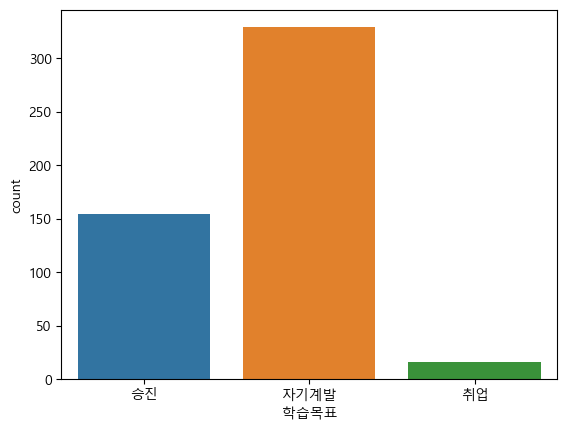

In [52]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['학습목표'].value_counts()) # 329 / 155 / 16

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['학습목표'].value_counts() / df.shape[0]) # 0.658 / 0.31 / 0.032

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot( x = df['학습목표'])

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-3) 학습방법

In [28]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['학습방법'].value_counts()) # 208 / 162 / 130

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['학습방법'].value_counts() / df.shape[0]) # 0.416 / 0.324 / 0.26

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot( x = df['학습방법'])

온라인강의     0.416
오프라인강의    0.324
참고서       0.260
Name: 학습방법, dtype: float64

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-4) 강의 학습 교재 유형 

일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64
일반적인 영어 텍스트 기반 교재        0.272
영상 교재                    0.256
뉴스/이슈 기반 교재              0.244
비즈니스 시뮬레이션(Role Play)    0.228
Name: 강의 학습 교재 유형, dtype: float64


<Axes: xlabel='강의 학습 교재 유형', ylabel='count'>

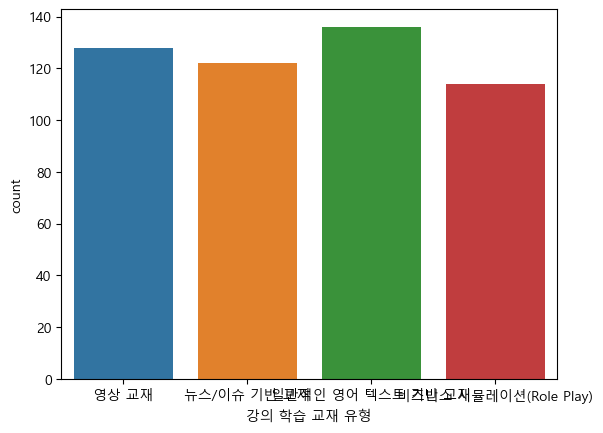

In [53]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['강의 학습 교재 유형'].value_counts()) # 136 / 128 / 122 / 114

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['강의 학습 교재 유형'].value_counts() / df.shape[0]) # 0.272 / 0.256 / 0.244 / 0.228

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot( x = df['강의 학습 교재 유형'])

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-5) 학습빈도 

주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64
주3-4회       0.302
주5-6회       0.254
주1-2회       0.248
매일(주 7회)    0.196
Name: 학습빈도, dtype: float64


<Axes: xlabel='학습빈도', ylabel='count'>

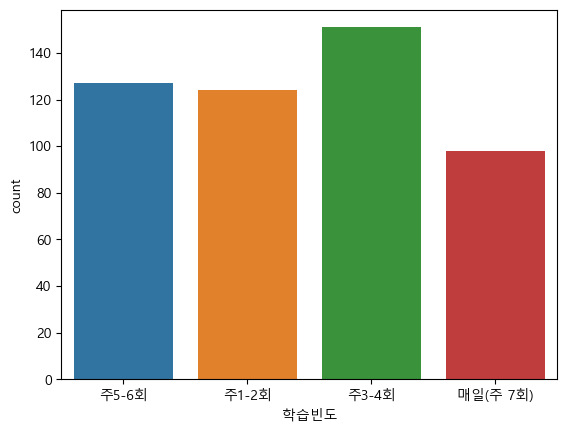

In [54]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['학습빈도'].value_counts()) # 151 / 127 / 124 / 98

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['학습빈도'].value_counts() / df.shape[0]) # 0.302 / 0.254 / 0.248 / 0.196

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot( x = df['학습빈도'])

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-6) 취약분야 인지 여부

알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64
알고 있음       0.922
알고 있지 않음    0.078
Name: 취약분야 인지 여부, dtype: float64


<Axes: xlabel='취약분야 인지 여부', ylabel='count'>

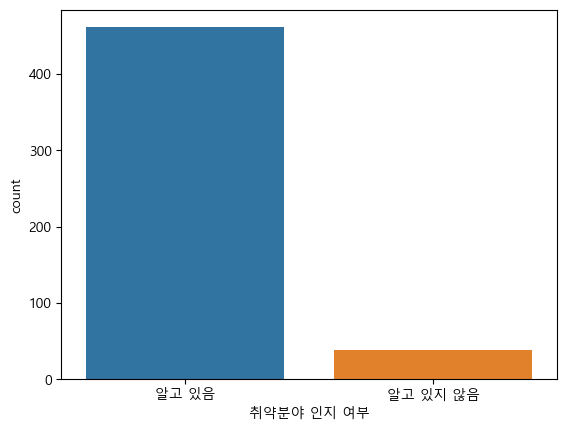

In [55]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['취약분야 인지 여부'].value_counts()) # 461 / 39

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['취약분야 인지 여부'].value_counts() / df.shape[0]) # 0.922 / 0.078

## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot( x = df['취약분야 인지 여부'])

#### &nbsp;&nbsp; 2-3) 수치형 변수
   * 분석 방법 : 기초 통계, 히스토그램, boxplot
   * 대상 변수 : 'Birth_Year', '기출문제 공부 횟수','토익 모의테스트 횟수',  '1st_Total_Score', '2st_Total_Score'
             

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-1) Bitrh_Year

,count,mean,std,min,25%,50%,75%,max
Birth_Year,500.0,1992.906,8.224381,1973.0,1986.75,1992.5,2000.0,2007.0


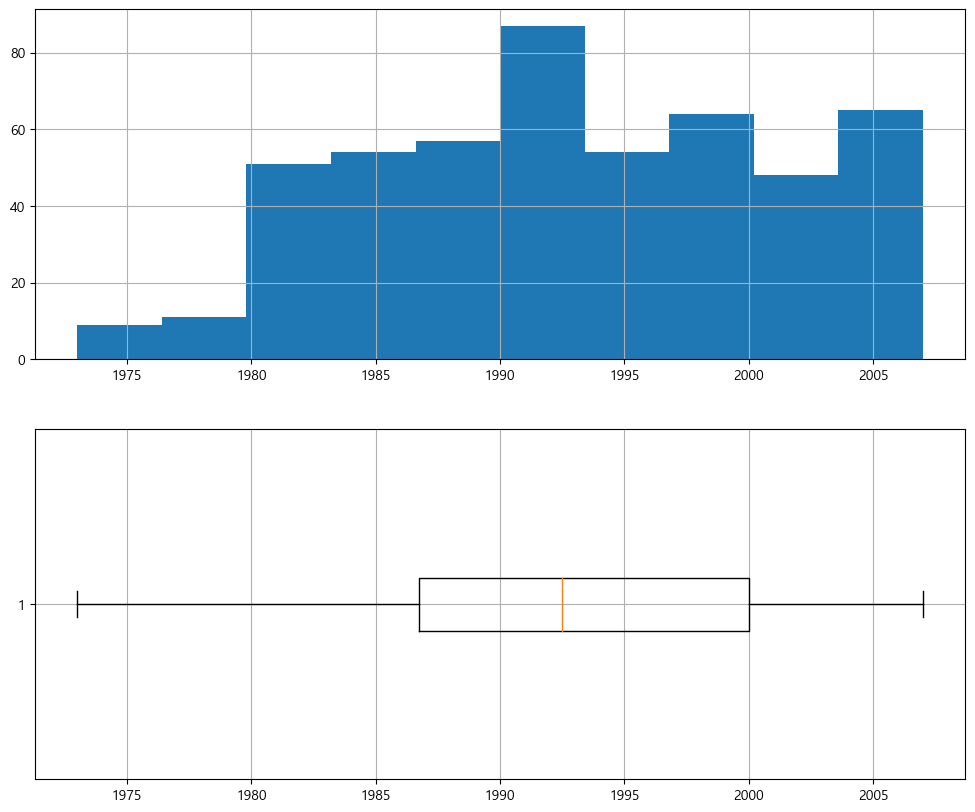

In [60]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(df[['Birth_Year']].describe().T)

## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['Birth_Year'])
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(df['Birth_Year'], vert = False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-2) 기출문제 공부 횟수

,count,mean,std,min,25%,50%,75%,max
기출문제 공부 횟수,500.0,5.098,2.779901,1.0,3.0,5.0,7.0,10.0


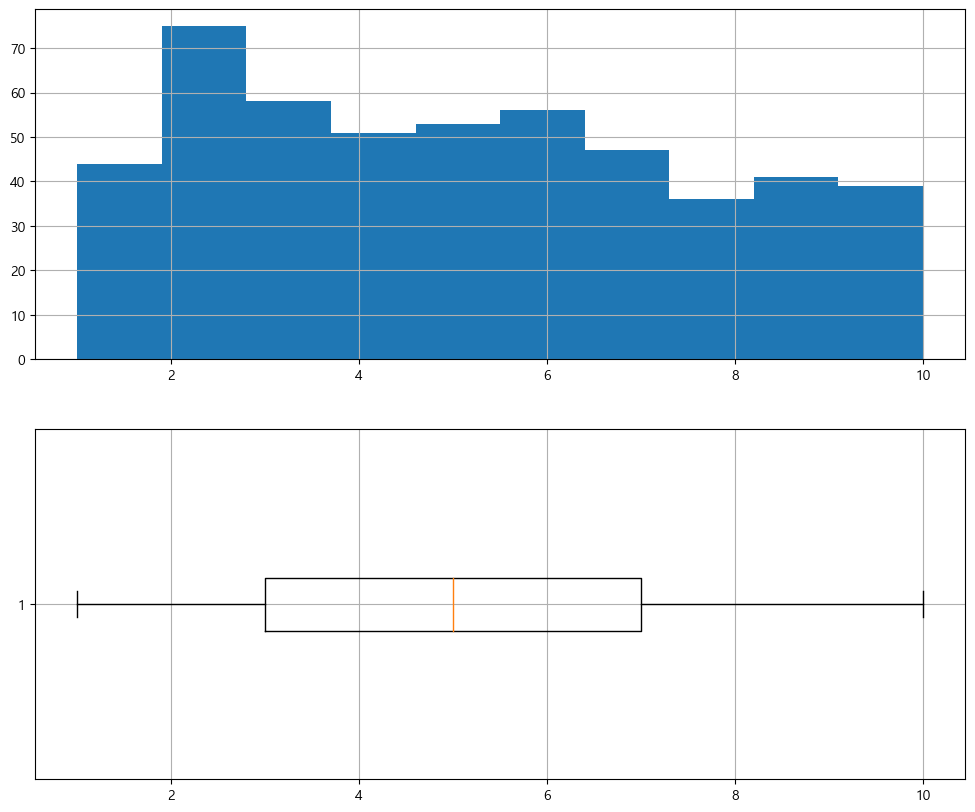

In [61]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(df[['기출문제 공부 횟수']].describe().T)

## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['기출문제 공부 횟수'])
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(df['기출문제 공부 횟수'], vert = False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-3) 토익 모의테스트 횟수

,count,mean,std,min,25%,50%,75%,max
토익 모의테스트 횟수,500.0,9.46,4.955554,1.0,5.0,8.0,13.25,20.0


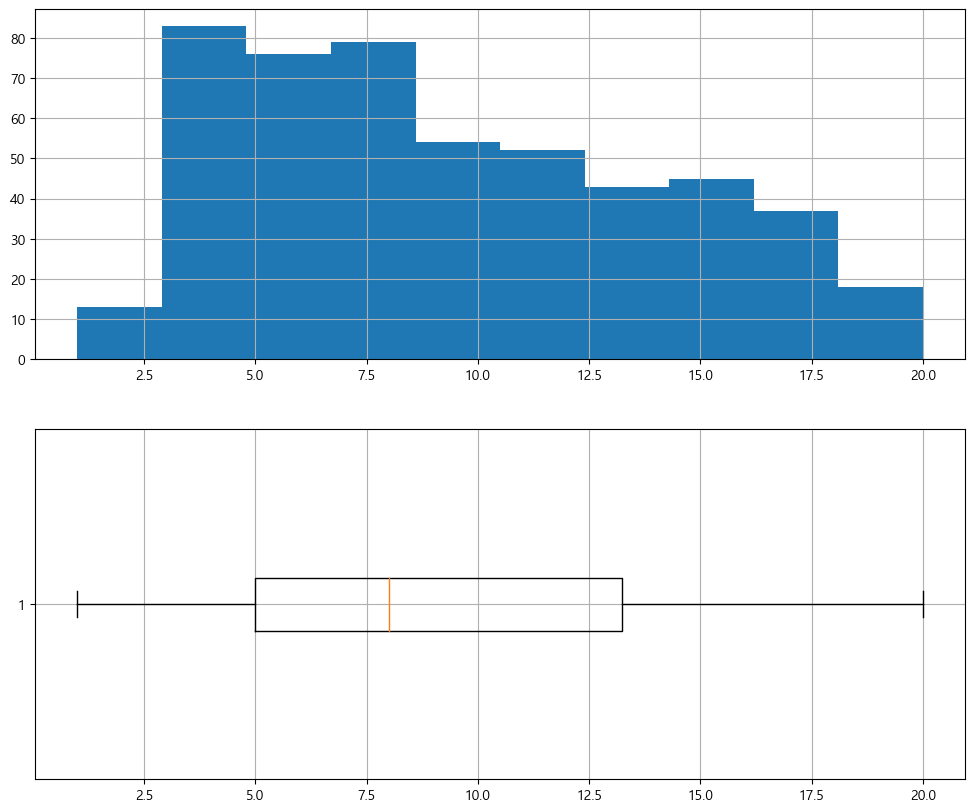

In [62]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(df[['토익 모의테스트 횟수']].describe().T)

## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['토익 모의테스트 횟수'])
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(df['토익 모의테스트 횟수'], vert = False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-4) 1st_Total_Score

,count,mean,std,min,25%,50%,75%,max
1st_Total_Score,500.0,626.7,148.57171,250.0,519.0,642.0,735.0,970.0


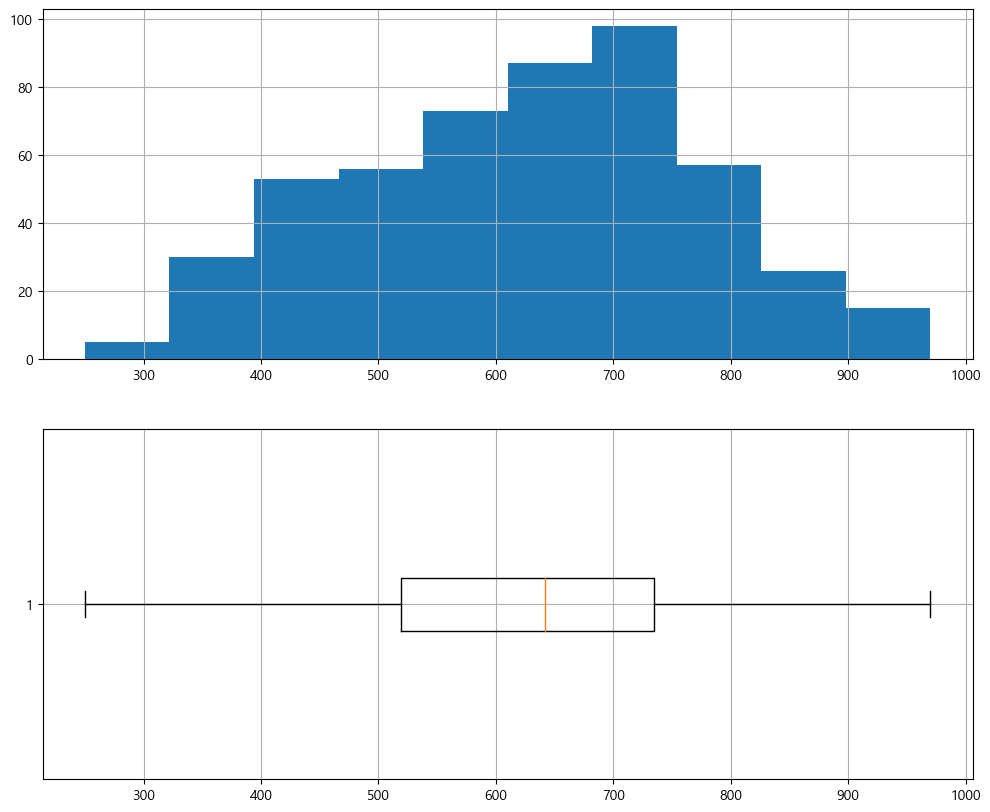

In [63]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(df[['1st_Total_Score']].describe().T)

## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['1st_Total_Score'])
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(df['1st_Total_Score'], vert = False)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-5) 2nd_Total_Score

,count,mean,std,min,25%,50%,75%,max
2nd_Total_Score,500.0,676.284,153.178624,260.0,557.75,691.0,790.5,990.0


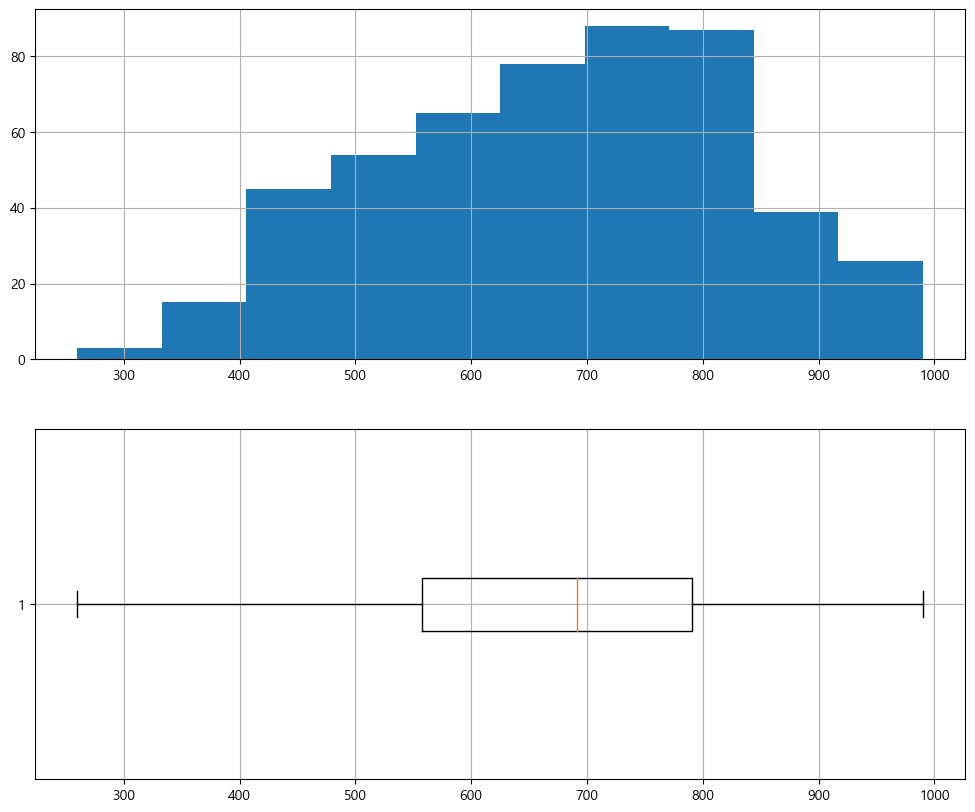

In [64]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력
display(df[['2nd_Total_Score']].describe().T)

## 그래프 분석 : histplot, boxplot
## 코드 입력
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.hist(df['2nd_Total_Score'])
plt.grid()

plt.subplot(2,1,2)
plt.boxplot(df['2nd_Total_Score'], vert = False)
plt.grid()

plt.show()

## [정리] 단변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

- 2회차-> 3회차 응시 시 평균 61.5점 정도 상승하였다.
- 토익 응시 목표는 자기계발 or 승진이 대다수였다.
- 학습강의 교재유형의 차이는 크지 않았다.
- 학습 빈도는 주 3~4회가 가장 많았고 주7회가 가장 적었다.
- 응시생의 대부분은 자신의 취약분야를 인지하고 있었다.

<br><br><hr><br><br>

## 3. 이변량 분석

- 수치형 feature --> 수치형 target
    - 전체 변수들 간의 상관관계 구하기
        * 범주형 변수를 제외한 데이터셋을 이용하여
        * .corr() + sns.heatmap() 으로 전체 상관계수를 시각화
    - 상관계수 상위 몇개에 대해서 feature와 target에 대해 
        * 상관분석을 통해 상관계수가 유의미함을 분석
        * 산점도를 통해 상관관계를 시각화하여 분석
- 범주형 feature --> 수치형 target
    * 범주간에 target의 평균의 차이가 있는지 분석
    * 범주별 barplot으로 평균의 차이를 시각화하여 분석

#### &nbsp;&nbsp; 3-1) 수치형 feature --> 수치형 target


##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-1) 전체 수치형 변수들 간의 상관관계 분석

* 수치형 변수 리스트 만들기

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

In [68]:
# 수치형 변수 리스트 정의
col_num = ['Birth_Year','3rd_LC_Score','3rd_RC_Score','3rd_Total_Score', '기출문제 공부 횟수','토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score', '1st_Total_Score',
            '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score', 'Score_diff_total']

In [70]:
## 수치형 변수들의 데이터 확인
df[col_num]

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1973,345,336,681,7,10,181,173,354,227,213,440,241
1,1982,380,368,748,4,14,330,290,620,354,339,693,55
2,1995,416,382,798,4,4,367,309,676,396,365,761,37
3,1987,495,397,892,9,8,470,285,755,495,341,836,56
4,1994,398,437,835,6,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2006,364,336,700,10,13,347,315,662,349,321,670,30
496,1988,187,252,439,9,17,112,250,362,120,251,371,68
497,2006,255,167,422,2,4,252,150,402,254,158,412,10
498,1990,422,370,792,4,7,371,324,695,378,326,704,88


* 숫자형 데이터의 상호 상관관계

In [223]:
## 데이터 프레임의 상관계수 도출하기 : corr
## 코드 입력
df[col_num].corr()

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
Birth_Year,1.000000,0.034871,0.027302,0.032645,0.000754,-0.010049,0.065178,0.051614,0.067610,0.058882,0.060268,0.065340,-0.123791
3rd_LC_Score,0.034871,1.000000,0.810450,0.951776,0.042070,0.009477,0.892739,0.641789,0.888068,0.951131,0.725373,0.919824,0.188377
3rd_RC_Score,0.027302,0.810450,1.000000,0.951058,0.035350,0.012057,0.651576,0.892840,0.895484,0.729434,0.948760,0.920256,0.183897
3rd_Total_Score,0.032645,0.951776,0.951058,1.000000,0.040950,0.011285,0.812176,0.806150,0.937450,0.883673,0.879439,0.967091,0.195372
기출문제 공부 횟수,0.000754,0.042070,0.035350,0.040950,1.000000,0.822999,-0.001871,-0.010960,-0.007464,-0.013591,-0.012960,-0.014495,0.216523
토익 모의테스트 횟수,-0.010049,0.009477,0.012057,0.011285,0.822999,1.000000,-0.020741,-0.035071,-0.032380,-0.033481,-0.025364,-0.032288,0.168731
1st_LC_Score,0.065178,0.892739,0.651576,0.812176,-0.001871,-0.020741,1.000000,0.489982,0.861374,0.951472,0.569375,0.834647,-0.030968
1st_RC_Score,0.051614,0.641789,0.892840,0.806150,-0.010960,-0.035071,0.489982,1.000000,0.864873,0.568388,0.956994,0.836292,-0.060947
1st_Total_Score,0.067610,0.888068,0.895484,0.937450,-0.007464,-0.032380,0.861374,0.864873,1.000000,0.879117,0.885532,0.967955,-0.053348
2nd_LC_Score,0.058882,0.951131,0.729434,0.883673,-0.013591,-0.033481,0.951472,0.568388,0.879117,1.000000,0.661840,0.911918,-0.048322


* 상관계수 시각화 

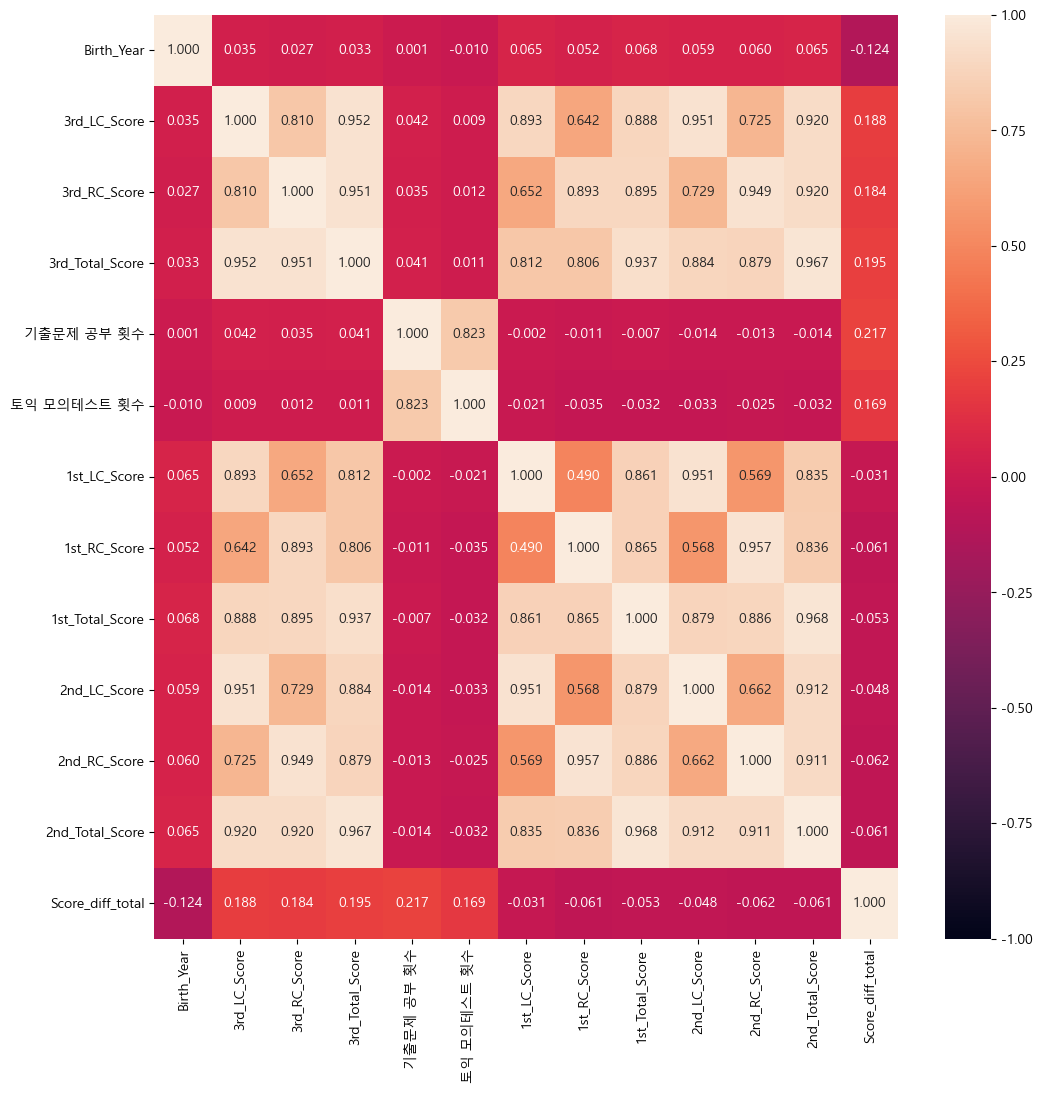

In [161]:
## 상관계수값을 heatmap을 이용하여 시각화 : heatmap
## 코드 입력
plt.figure(figsize = (12,12))
sns.heatmap(df[col_num].corr(), annot = True, fmt = '.3f', vmax = 1, vmin = -1)
plt.show()

### target과 상관계수 상위 3개 살펴보기

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-2) 기출문제 공부 횟수

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '기출문제 공부 횟수'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '기출문제 공부 횟수'에 따라 'Score_diff_total'에 차이가 있다.'

In [87]:
# 상관분석 (pearsonr)
## 코드 입력
result = spst.pearsonr(df['기출문제 공부 횟수'], df['Score_diff_total'])
result[0], result[1]

(0.21652328806766585, 1.020785279200108e-06)

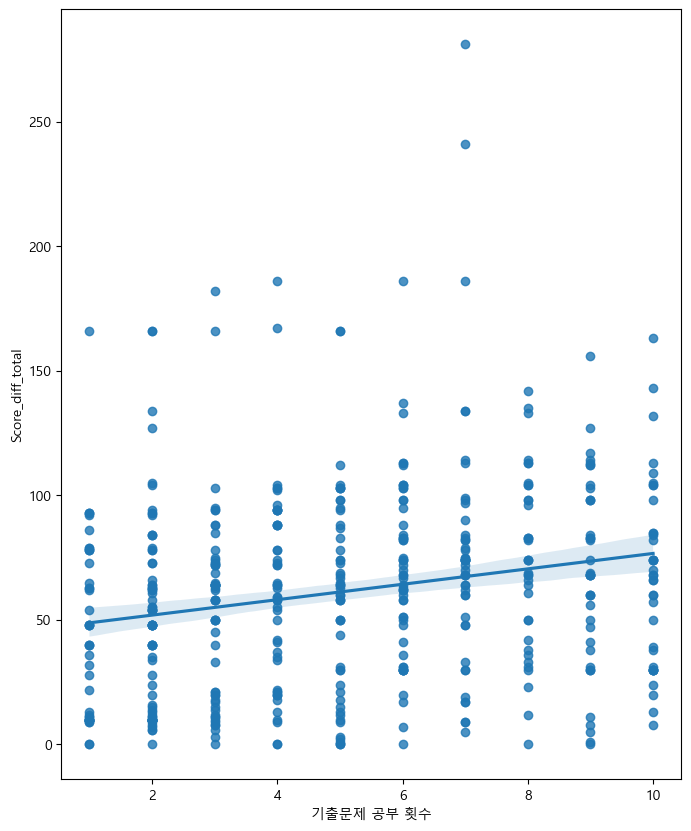

In [91]:
# regplot으로 시각화
## 코드 입력
plt.figure(figsize = (8,10))
sns.regplot(x = df['기출문제 공부 횟수'], y = df['Score_diff_total'])
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-3) 토익 모의테스트 횟수

In [160]:
## 가설 수립
## 귀무 가설(H0) : '토익 모의테스트 횟수'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '토익 모의테스트 횟수'에 따라 'Score_diff_total'에 차이가 있다.'

In [92]:
# 상관분석 (pearsonr)
## 코드 입력
result = spst.pearsonr(df['토익 모의테스트 횟수'], df['Score_diff_total'])
result[0], result[1]

(0.16873093322890687, 0.00015021865019138392)

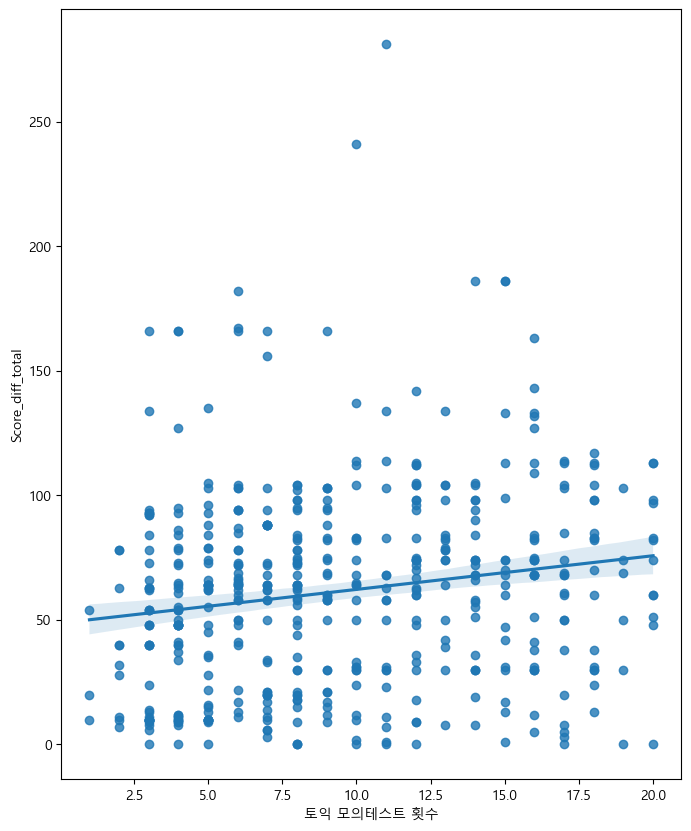

In [93]:
# regplot으로 시각화
## 코드 입력
plt.figure(figsize = (8,10))
sns.regplot(x = df['토익 모의테스트 횟수'], y = df['Score_diff_total'])
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-4) 2차 종합점수

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '2차 종합점수'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '2차 종합점수'에 따라 'Score_diff_total'에 차이가 있다.'

In [97]:
# 상관분석 (pearsonr)
## 코드 입력
result = spst.pearsonr(df['2nd_Total_Score'], df['Score_diff_total'])
result[0], result[1]

(-0.06058469921846522, 0.17619398209815046)

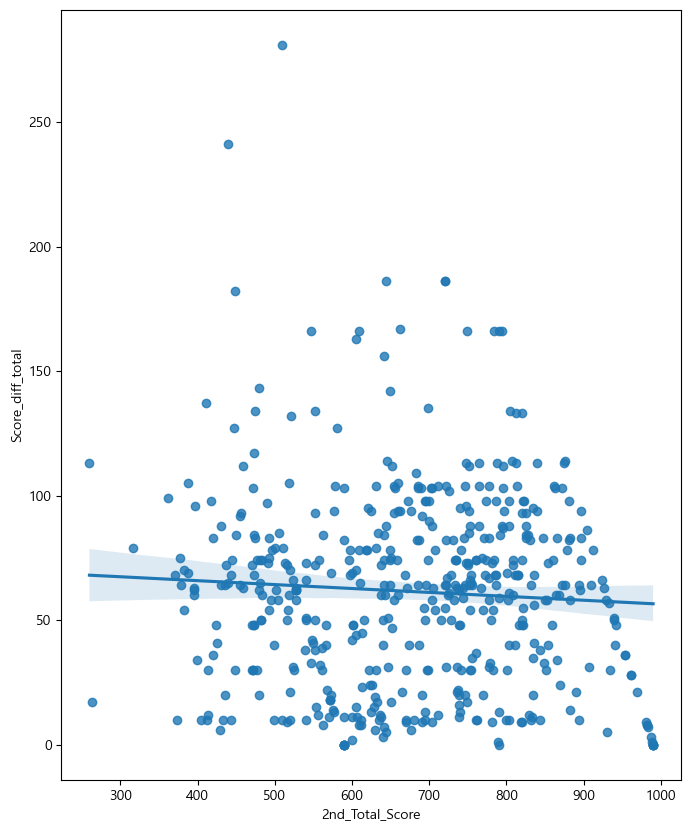

In [98]:
# regplot으로 시각화
## 코드 입력
plt.figure(figsize = (8,10))
sns.regplot(x = df['2nd_Total_Score'], y = df['Score_diff_total'])
plt.show()

#### &nbsp;&nbsp; 3-2) 범주형 feature -> 수치형 target



In [ ]:
## 범주형 feature

## 'Gender', '학습목표', '학습방법', '강의 학습 교재 유형',
## '학습빈도', '취약분야 인지 여부', 'age_group'

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-1) Gender 

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '성별'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '성별'에 따라 'Score_diff_total'에 차이가 있다.'

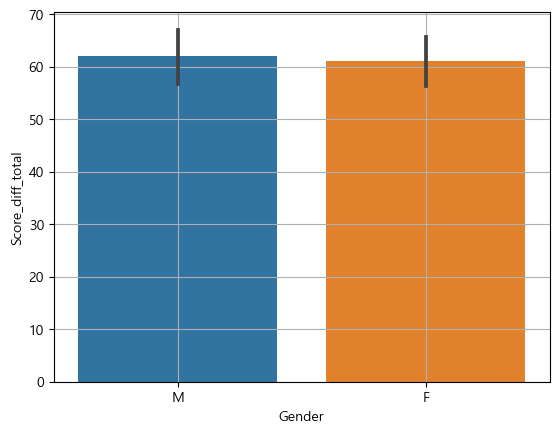

In [150]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['Gender'], y = df['Score_diff_total'])
plt.grid()
plt.show()

In [114]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['Gender'].value_counts()

M    250
F    250
Name: Gender, dtype: int64

In [122]:
## 평균 분석 : ttest_ind
## 코드 입력
M = df.loc[df['Gender'] == 'M','Score_diff_total']
F = df.loc[df['Gender'] == 'F','Score_diff_total']

spst.ttest_ind(M, F)

Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-2) 학습목표

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '학습목표'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '학습목표'에 따라 'Score_diff_total'에 차이가 있다.'

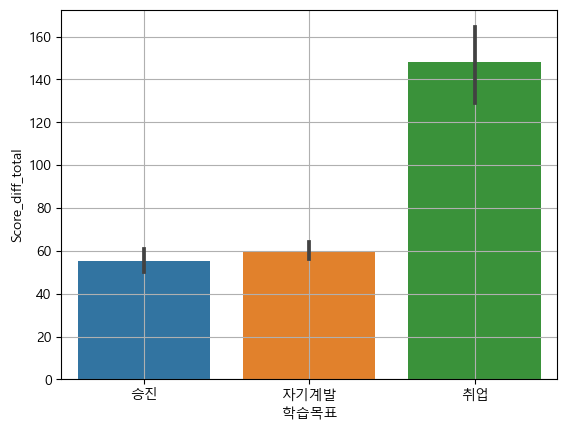

In [151]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['학습목표'], y = df['Score_diff_total'])
plt.grid()
plt.show()

In [119]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['학습목표'].value_counts()

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64

In [121]:
## 분산 분석 : f_oneway
## 코드 입력
developing = df.loc[df['학습목표'] == '자기계발', 'Score_diff_total']
promotion = df.loc[df['학습목표'] == '승진', 'Score_diff_total']
hiring = df.loc[df['학습목표'] == '취업', 'Score_diff_total']

spst.f_oneway(developing, promotion, hiring)

F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-3) 학습방법 

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '학습방법'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '학습방법'에 따라 'Score_diff_total'에 차이가 있다.'

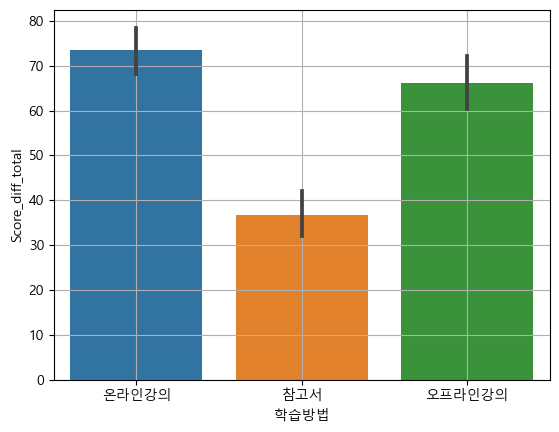

In [152]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['학습방법'], y = df['Score_diff_total'])
plt.grid()
plt.show()

In [124]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['학습방법'].value_counts()

온라인강의     208
오프라인강의    162
참고서       130
Name: 학습방법, dtype: int64

In [125]:
## 분산 분석 : f_oneway
## 코드 입력
on = df.loc[df['학습방법'] == '온라인강의', 'Score_diff_total']
off = df.loc[df['학습방법'] == '오프라인강의', 'Score_diff_total']
book = df.loc[df['학습방법'] == '참고서', 'Score_diff_total']

spst.f_oneway(on, off, book)

F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-4) 강의 학습 교재 유형

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '강의 학습 교재 유형'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '강의 학습 교재 유형'에 따라 'Score_diff_total'에 차이가 있다.'

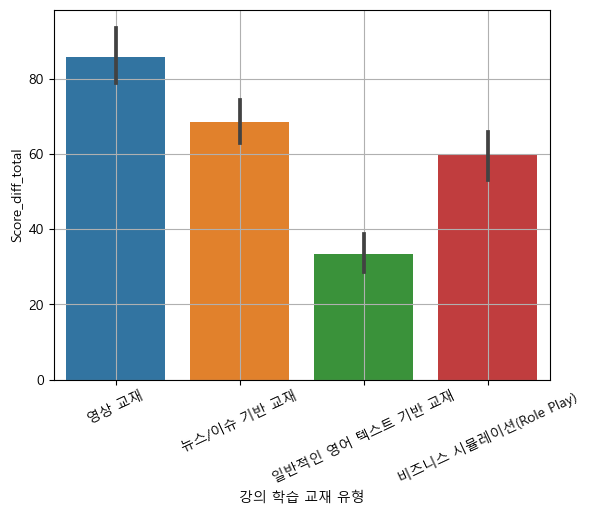

In [153]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['강의 학습 교재 유형'], y = df['Score_diff_total'])
plt.xticks(rotation = 25)
plt.grid()
plt.show()

In [127]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['강의 학습 교재 유형'].value_counts()

일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64

In [131]:
## 분산 분석 : f_oneway
## 코드 입력
video = df.loc[df['강의 학습 교재 유형'] == '영상 교재', 'Score_diff_total']
news = df.loc[df['강의 학습 교재 유형'] == '뉴스/이슈 기반 교재', 'Score_diff_total']
text = df.loc[df['강의 학습 교재 유형'] == '일반적인 영어 텍스트 기반 교재', 'Score_diff_total']
role = df.loc[df['강의 학습 교재 유형'] == '비즈니스 시뮬레이션(Role Play)', 'Score_diff_total']

spst.f_oneway(video, news, text, role)

F_onewayResult(statistic=52.478536797553154, pvalue=1.7913087495810163e-29)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-5) 학습빈도

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '학습빈도'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '학습빈도'에 따라 'Score_diff_total'에 차이가 있다.'

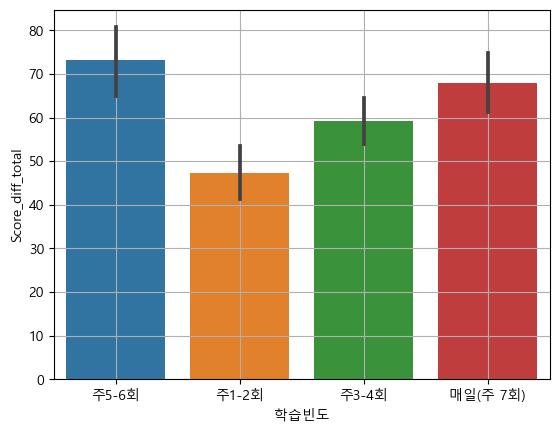

In [154]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['학습빈도'], y = df['Score_diff_total'])
plt.grid()
plt.show()

In [134]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['학습빈도'].value_counts()

주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64

In [136]:
## 분산 분석 : f_oneway
## 코드 입력
f_s = df.loc[df['학습빈도'] == '주5-6회', 'Score_diff_total']
o_t = df.loc[df['학습빈도'] == '주1-2회', 'Score_diff_total']
t_f = df.loc[df['학습빈도'] == '주3-4회', 'Score_diff_total']
everyday = df.loc[df['학습빈도'] == '매일(주 7회)', 'Score_diff_total']

spst.f_oneway(f_s, o_t, t_f, everyday)

F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-6) 취약분야 인지 여부

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '취약분야 인지 여부'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '취약분야 인지 여부'에 따라 'Score_diff_total'에 차이가 있다.'

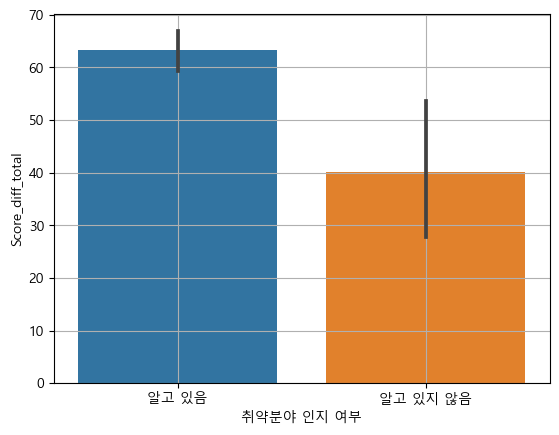

In [146]:
## 그래프 분석 : barplot
## 코드 입력
sns.barplot(x = df['취약분야 인지 여부'], y = df['Score_diff_total'])
plt.grid()
plt.show()

In [140]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
df['취약분야 인지 여부'].value_counts()

알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64

In [144]:
## 평균 분석 : ttest_ind
## 코드 입력
aware = df.loc[df['취약분야 인지 여부'] == '알고 있음','Score_diff_total']
unaware = df.loc[df['취약분야 인지 여부'] == '알고 있지 않음','Score_diff_total']

spst.ttest_ind(aware, unaware)

Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

## [정리] 이변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

- 성별을 제외한 모든 범주형 feature들은 target과 상관관계를 가진다.
- 취업을 학습목표로 한 응시생이 점수상승폭이 가장 컸다.
- 강의 학습 교재 유형에서 영상교재로 공부한 응시생이 가장 점수상승폭이 컸고, 일반 영어텍스트 기반 교재로 공부한 응시생이 가장 점수상승폭이 작았다.
- 학습빈도가 빈번할수록 대체로 점수상승폭이 컸다.

<br><br><hr><br><br>

## <font color="orange">**4. 도전 미션** </font>

#### &nbsp;&nbsp; 4-1)  나이, 나이대 정보 추가 및 데이터 분석

  - 생년월일을 나이로 변경하여 **열(age)**을 추가하세요.
  - 나이로 변경한 열을 아래의 예시를 참고하여 연령대로 구분하여 **열(age group)**을 추가하세요.
    - 연령 구분 예시 : 20세 이하, 21세-25세, 26세-30세, 31세-35세, 36세-40세, 41세-45세, 46세-50세, 50세 이상
  - 나이, 나이대 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-1) 나이(age) 열 추가

In [183]:
# 라이브러리 불러오기
from datetime import datetime

# 현재 날짜 구하기
## 코드 입력
year_now = datetime.today().year

# 데이터프레임에서 Birth_Year 열의 값으로부터 현재 날짜(2023년도) 기준 나이 계산 
# 'age'열에 값 추가하기
## 코드 입력
df['age'] = year_now - df['Birth_Year']

# 확인
## 코드 입력

0      50
1      41
2      28
3      36
4      29
       ..
495    17
496    35
497    17
498    33
499    39
Name: age, Length: 500, dtype: int64

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-2) 나이(age) 단변량 분석

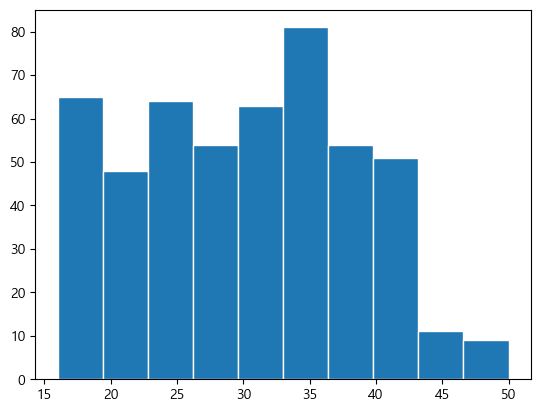

In [190]:
# age 데이터의 기초 통계량 확인
## 코드 입력
df['age'].describe()

# age 데이터 분포 시각화 확인
## 코드 입력
plt.hist(df['age'], edgecolor = 'w')
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-3) 나이대(age_group) 열 추가

In [193]:
## cut() 함수를 활용하여 나이 연령대 계산

## 각 나이 연령대 구간의 경계(bins) 정의
## 코드 입력
bins = [10, 19, 29, 39, 49, 59]

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = ['10대', '20대', '30대', '40대', '50대']

## cut 함수 사용
## 코드 입력
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels)

## 데이터 확인
df

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age,age_group
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,10,181,173,354,227,213,440,241,50,50대
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,14,330,290,620,354,339,693,55,41,40대
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,367,309,676,396,365,761,37,28,20대
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,8,470,285,755,495,341,836,56,36,30대
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,4,273,372,645,314,426,740,95,29,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),...,13,347,315,662,349,321,670,30,17,10대
496,497,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),...,17,112,250,362,120,251,371,68,35,30대
497,498,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,252,150,402,254,158,412,10,17,10대
498,499,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,...,7,371,324,695,378,326,704,88,33,30대


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-4) 나이대(age_group) 단변량 분석

30대    198
20대    166
40대     68
10대     65
50대      3
Name: age_group, dtype: int64
30대    0.396
20대    0.332
40대    0.136
10대    0.130
50대    0.006
Name: age_group, dtype: float64


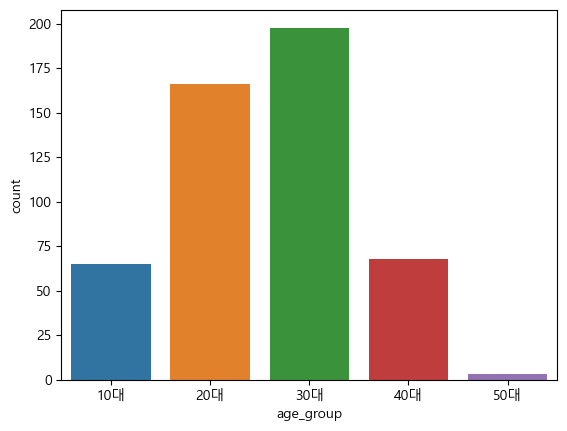

In [196]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력
print(df['age_group'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력
print(df['age_group'].value_counts() / df.shape[0])

# age_group 기준으로 데이터 분포 시각화 확인 : countplot()
## 코드 입력
sns.countplot(x = df['age_group'])
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-5) 나이(age) -> Target 이변량 분석

In [ ]:
## 가설 수립
## 귀무 가설(H0) : '나이'에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : '나이'에 따라 'Score_diff_total'에 차이가 있다.'

PearsonRResult(statistic=0.12379130531187277, pvalue=0.005574758185560602)


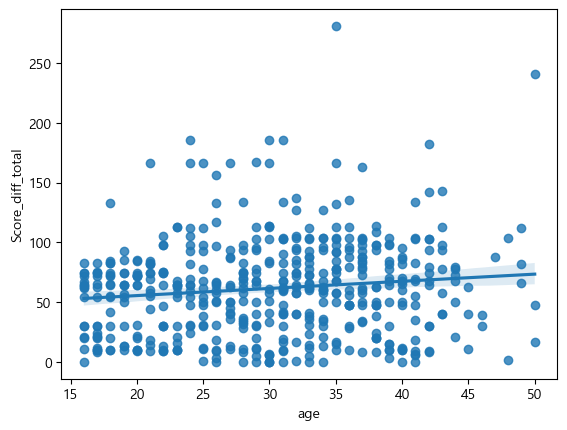

In [199]:
## 상관분석 (pearsonr)
## 코드 입력
print(spst.pearsonr(df['age'], df['Score_diff_total']))

## regplot으로 시각화
## 코드 입력
sns.regplot(x = df['age'], y = df['Score_diff_total'])

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-6) 나이대(age_group) -> Target 이변량 분석

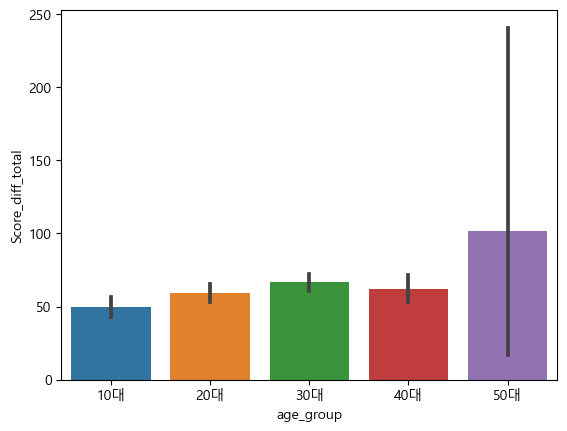

In [203]:
## barplot 시각화
## 코드 입력
sns.barplot(x = df['age_group'], y = df['Score_diff_total'])
plt.show()

In [204]:
## 범주 데이터 확인
## 코드 입력
df['age_group'].value_counts()

30대    198
20대    166
40대     68
10대     65
50대      3
Name: age_group, dtype: int64

In [206]:
## 분산 분석 : f_oneway
## 코드 입력
A = df.loc[df['age_group'] == '10대', 'Score_diff_total']
B = df.loc[df['age_group'] == '20대', 'Score_diff_total']
C = df.loc[df['age_group'] == '30대', 'Score_diff_total']
D = df.loc[df['age_group'] == '40대', 'Score_diff_total']
E = df.loc[df['age_group'] == '50대', 'Score_diff_total']

spst.f_oneway(A, B, C, D, E)

F_onewayResult(statistic=3.1891226861653696, pvalue=0.01328836559678377)

#### &nbsp;&nbsp; 4-2) 1,2회차 점수 차이 정보 추가 및 데이터 분석

* **세부요구사항**
    - 1,2회차 점수 차이 ( 2회차 점수 - 1회차 점수)를 구하여 **열(Score_diff_total_2_1)**을 추가하세요.
    - 1,2회차 점수 차이 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-1) 1,2회 점수 차 (Score_diff_total_2_1) 열 추가

In [215]:
## 'Score_diff_total_2_1' = '2nd_Total_Score' - '1st_Total_Score'
## 코드 입력

df['Score_diff_total_2_1'] = df['2nd_Total_Score'] - df['1st_Total_Score']
df['Score_diff_total_2_1']

0      86
1      73
2      85
3      81
4      95
       ..
495     8
496     9
497    10
498     9
499     5
Name: Score_diff_total_2_1, Length: 500, dtype: int64

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-2) Score_diff_total_2_1 단변량 분석

count    500.000000
mean      49.584000
std       38.467993
min        2.000000
25%       10.000000
50%       50.000000
75%       74.000000
max      266.000000
Name: Score_diff_total_2_1, dtype: float64


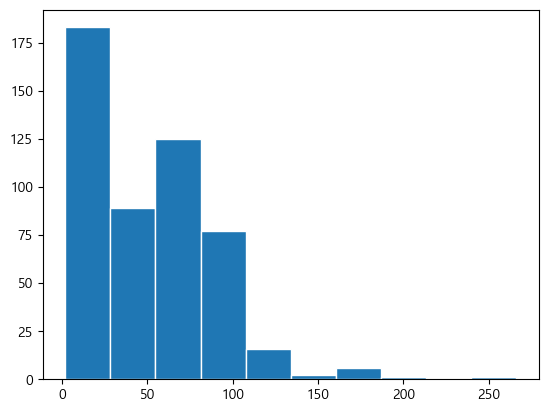

In [216]:
## Score_diff_total_2_1 데이터의 기초 통계량 확인
## 코드 입력
print(df['Score_diff_total_2_1'].describe())

## Score_diff_total_2_1  데이터 분포 시각화 확인
## 코드 입력
plt.hist(df['Score_diff_total_2_1'], edgecolor = 'w')
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-3) Score_diff_2_1 -> Target 이변량 분석

PearsonRResult(statistic=-0.03520537767595357, pvalue=0.4321666918578589)


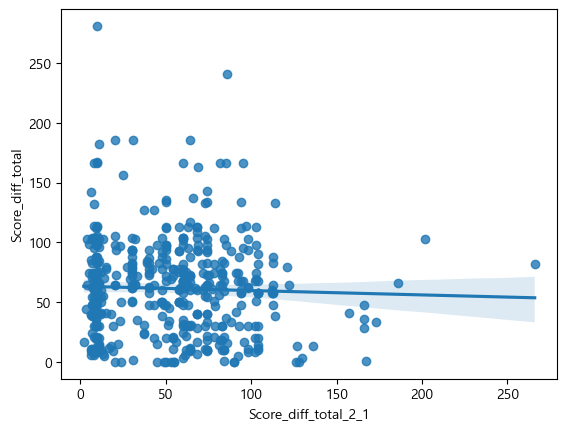

In [217]:
## 상관분석 (pearsonr)
## 코드 입력
print(spst.pearsonr(df['Score_diff_total_2_1'], df['Score_diff_total']))

## regplot으로 시각화
## 코드 입력
sns.regplot(x = df['Score_diff_total_2_1'], y = df['Score_diff_total'])
plt.show()

#### &nbsp;&nbsp; 4-3) 추가하고 싶은 정보를 생성하고, 이에 대한 단변량/이변량 분석을 수행

In [ ]:
# 가설수립
## 귀무 가설(H0) : 첫번째 응시점수와 두번째 응시점수의 차에 따라 'Score_diff_total'에 차이가 없다.'
## 대립 가설(H1) : 첫번째 응시점수와 두번째 응시점수의 차에 따라 'Score_diff_total'에 차이가 있다.'

In [218]:
## 열(데이터) 추가
## 코드 입력
df['Score_diff_total_3_1'] = df['3rd_Total_Score'] - df['1st_Total_Score']
df['Score_diff_total_3_1']

0      327
1      128
2      122
3      137
4      190
      ... 
495     38
496     77
497     20
498     97
499    104
Name: Score_diff_total_3_1, Length: 500, dtype: int64

count    500.000000
mean     111.098000
std       54.326265
min       12.000000
25%       74.000000
50%      108.000000
75%      146.000000
max      348.000000
Name: Score_diff_total_3_1, dtype: float64


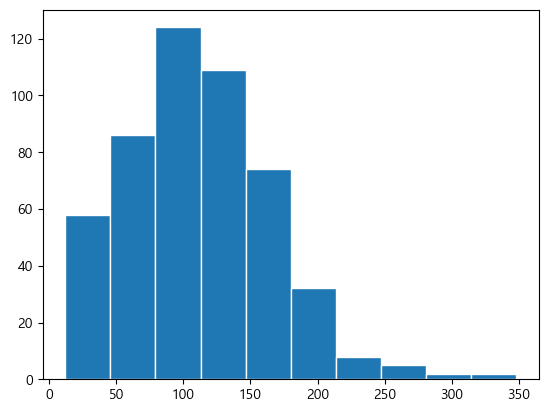

In [220]:
## 단변량 분석

# 기초 통계량 확인
## 코드 입력
print(df['Score_diff_total_3_1'].describe())

# 데이터 분포 시각화 확인
## 코드 입력
plt.hist(df['Score_diff_total_3_1'], edgecolor = 'w')
plt.show()

PearsonRResult(statistic=0.706560093042758, pvalue=8.196737455280651e-77)


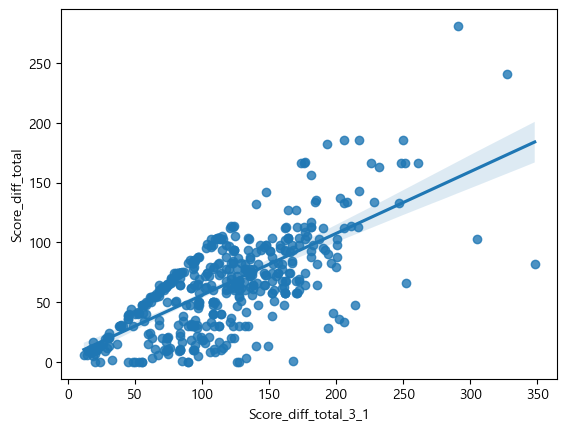

In [222]:
## 이변량 분석

# 상관분석 (pearsonr)
## 코드 입력
print(spst.pearsonr(df['Score_diff_total_3_1'], df['Score_diff_total']))

# regplot으로 시각화
## 코드 입력
sns.regplot(x = df['Score_diff_total_3_1'], y = df['Score_diff_total'])
plt.show()

PearsonRResult(statistic=0.6823396569191328, pvalue=9.107716073114935e-70)


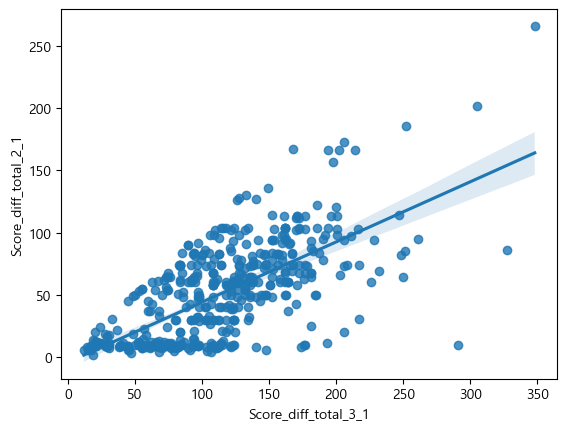

In [225]:
## 이변량 분석

# 상관분석 (pearsonr)
## 코드 입력
print(spst.pearsonr(df['Score_diff_total_3_1'], df['Score_diff_total_2_1']))

# regplot으로 시각화
## 코드 입력
sns.regplot(x = df['Score_diff_total_3_1'], y = df['Score_diff_total_2_1'])
plt.show()

- 1, 2회차간 점수차는 2, 3회차간 점수차에 상관성을 띄지 않지만,  
1,2 회차간 점수차와 2, 3회차간 점수차와 1, 3회차간 점수차에 강한 상관관계에 있다.

In [224]:
df.tail(2)

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age,age_group,Score_diff_total_2_2,Score_diff_total_2_1,Score_diff_total_3_1
498,499,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,...,695,378,326,704,88,33,30대,9,9,97
499,500,M,1984,235,226,461,승진,오프라인강의,비즈니스 시뮬레이션(Role Play),주5-6회,...,357,172,190,362,99,39,30대,5,5,104


## [정리] 3가지 추가 feature를 통해 파악된 비즈니스 인사이트는 무엇인가요?

- 1, 2회차간 점수차는 2, 3회차간 점수차에 상관성을 띄지 않지만,  
1,2 회차간 점수차와 2, 3회차간 점수차와 1, 3회차간 점수차에 강한 상관관계에 있다.

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!